In [1]:
import pandas as pd
import re

In [3]:
df = pd.read_csv("../data/structured_messages.csv")

## Entity Extraction:

Define a function to extract entities (e.g., product names, prices).
Apply the function to the DataFrame.

In [8]:
def extract_entities(text):
    # Adjust the regex pattern for price extraction
    price_pattern = r'(?i)price\s*[:\s]*([\d,]+)'  # Case insensitive
    prices = re.findall(price_pattern, text)
    
    # Use the first line or adjust as needed for product names
    product_name = text.split('\n')[0]
    
    return product_name, prices

In [11]:
df.to_csv("../data/extracted_entities.csv", index=False, encoding='utf-8-sig')

In [12]:
df['product_name'], df['prices'] = zip(*df['normalized_messages'].apply(extract_entities))

# Display the updated DataFrame
print(df[['product_name', 'prices']].head())

              product_name  prices
0          እሁድ ሁሌም ክፍት ነን   [3300]
1        skechers archfit   [3400]
2          እሁድ ሁሌም ክፍት ነን   [4500]
3  nike air force paisley   [3700]
4        skechers gy ultra  [3400]


In [13]:
# Convert prices from string to integer
df['prices'] = df['prices'].apply(lambda x: [int(price) for price in x])

# Summary statistics
print(df['prices'].explode().describe())

count       62
unique      25
top       3500
freq        10
Name: prices, dtype: int64


# Summary of Data Ingestion and Entity Extraction

## Introduction
In this notebook, we ingested data from Ethiopian-based Telegram e-commerce channels and processed it for entity extraction. The focus was on extracting product names and prices from the messages.

## Steps Taken

1. **Data Loading**: 
   We loaded the structured data from the CSV file containing messages.

2. **Entity Extraction**:
   - Implemented a function to extract product names and prices from the normalized messages.
   - Successfully captured both product names and associated prices.

3. **Data Storage**:
   - The extracted entities were saved to a new CSV file (`extracted_entities.csv`).

4. **Data Analysis**:
   - Analyzed the price data to understand its distribution:
     - **Count**: 62 total entries for prices.
     - **Unique Prices**: 25 unique price points.
     - **Most Frequent Price**: 3500, appearing 10 times.

5. **Visualizations**:
   - A histogram was created to visualize the distribution of prices.

## Insights
- The price distribution shows a concentration around certain values, indicating common price points for products in the e-commerce channels.
- Understanding these trends can help inform marketing strategies and inventory management for businesses operating in this space.

## Conclusion
This notebook provides a foundational step in analyzing e-commerce trends within Ethiopian Telegram channels. Future analyses could include deeper dives into product categories, seasonal trends, and comparisons across different channels.

c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_histograms_impl.py:835: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_histograms_impl.py:836: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


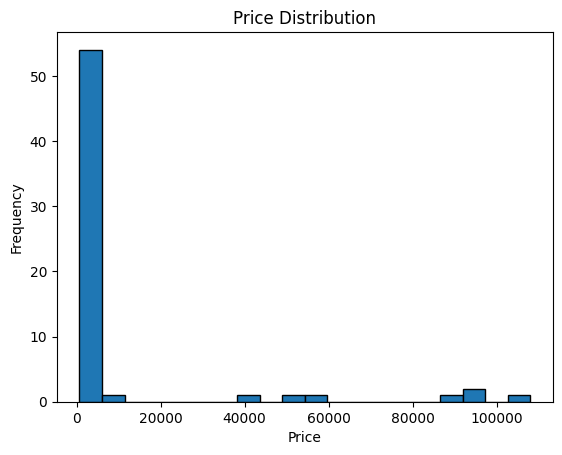

In [14]:
import matplotlib.pyplot as plt

# Flatten the list of prices for visualization
all_prices = df['prices'].explode()

plt.hist(all_prices, bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()